<a href="https://www.kaggle.com/code/mahimashukla12/regression-problem?scriptVersionId=136027509" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduates-admission-prediction/admission_data.csv


Working in digit identification problem with 70k Image data

And each having 28\*28 pixel (W\*H), 784 pixel for one image

That mean 784 nodes needed

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
import pandas as pd
data=pd.read_csv("/kaggle/input/graduates-admission-prediction/admission_data.csv")
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
X=data.iloc[:,0:-1]
Y=data.iloc[:,-1]
print(X.shape,Y.shape)

(500, 7) (500,)


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=108)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape


((400, 7), (100, 7), (400,), (100,))

In [9]:
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.fit_transform(X_test)


In [10]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear',))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='mean_squared_error',optimizer='Adam',)
hist=model.fit(X_train_scale,Y_train,epochs=15,validation_split=0.2)

Epoch 1/15
10/10 [==============================] - 1s 26ms/step - loss: 0.1718 - val_loss: 0.1261
Epoch 2/15
10/10 [==============================] - 0s 5ms/step - loss: 0.1071 - val_loss: 0.0745
Epoch 3/15
10/10 [==============================] - 0s 5ms/step - loss: 0.0606 - val_loss: 0.0401
Epoch 4/15
10/10 [==============================] - 0s 5ms/step - loss: 0.0331 - val_loss: 0.0247
Epoch 5/15
10/10 [==============================] - 0s 5ms/step - loss: 0.0233 - val_loss: 0.0211
Epoch 6/15
10/10 [==============================] - 0s 5ms/step - loss: 0.0209 - val_loss: 0.0203
Epoch 7/15
10/10 [==============================] - 0s 5ms/step - loss: 0.0198 - val_loss: 0.0188
Epoch 8/15
10/10 [==============================] - 0s 5ms/step - loss: 0.0178 - val_loss: 0.0165
Epoch 9/15
10/10 [==============================] - 0s 6ms/step - loss: 0.0151 - val_loss: 0.0142
Epoch 10/15
10/10 [==============================] - 0s 5ms/step - loss: 0.0128 - val_loss: 0.0124
Epoch 11/15
10/10 

In [13]:
y_pred=model.predict(X_test_scale)

4/4 [==============================] - 0s 2ms/step


In [14]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.5882299865000191

In [15]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='mean_squared_error',optimizer='Adam')
hist=model.fit(X_train_scale,Y_train,epochs=45,validation_split=0.2)

Epoch 1/45
10/10 [==============================] - 1s 20ms/step - loss: 0.9134 - val_loss: 0.7984
Epoch 2/45
10/10 [==============================] - 0s 7ms/step - loss: 0.7630 - val_loss: 0.6751
Epoch 3/45
10/10 [==============================] - 0s 6ms/step - loss: 0.6535 - val_loss: 0.5912
Epoch 4/45
10/10 [==============================] - 0s 5ms/step - loss: 0.5746 - val_loss: 0.5223
Epoch 5/45
10/10 [==============================] - 0s 5ms/step - loss: 0.5083 - val_loss: 0.4616
Epoch 6/45
10/10 [==============================] - 0s 6ms/step - loss: 0.4500 - val_loss: 0.4056
Epoch 7/45
10/10 [==============================] - 0s 7ms/step - loss: 0.3927 - val_loss: 0.3496
Epoch 8/45
10/10 [==============================] - 0s 5ms/step - loss: 0.3348 - val_loss: 0.2888
Epoch 9/45
10/10 [==============================] - 0s 5ms/step - loss: 0.2713 - val_loss: 0.2238
Epoch 10/45
10/10 [==============================] - 0s 5ms/step - loss: 0.2052 - val_loss: 0.1616
Epoch 11/45
10/10 

In [18]:
y_pred=model.predict(X_test_scale)

4/4 [==============================] - 0s 2ms/step


In [19]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.247533656092931

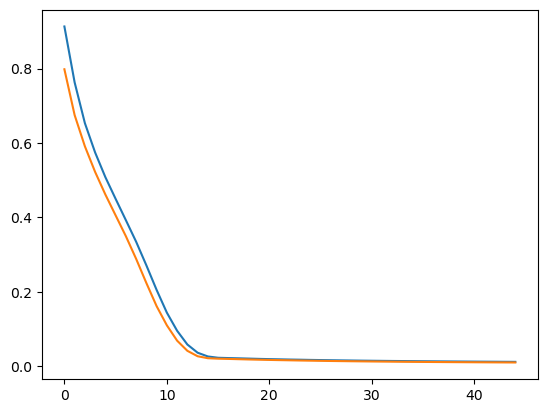

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()